
## data_month2
#### ระบบหลอดไฟส่องสว่าง | LED 7 Watt |                                      


In [2]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random



d =31
time_a = pd.date_range('2016-11-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-11-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

####### set databases to empty #########
query_empty = """truncate table data_month2.light_sys1""" 
c.execute(query_empty)
print "data_month2.light_sys1 are Empty!!! \n"

query = "SELECT watt FROM collected_info.15_light_sys WHERE no >= '%s'   AND no <= '%s'; "% (0,1500)
df = pd.read_sql(query, conn)

## set no.of light = 2:ห้องน้ำ || 4:ห้องนอน || 2:ห้องครัว || 4 ห้องนั่งเล่น  


def bed():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    random_bed =   ['20'] * 45 + ['21'] * 50  + ['22'] * 5  
    on_bed = random.choice(random_bed) 
    
    if 0 < duration_sec <= 15 :
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
        
    start_bed = (int(on_bed)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on lamp at bedroom on",on_bed,":",duration_min,":",duration_sec,"equal to", start_bed,"items"
           
    duration_hour1 = ['1'] * 5 + ['2'] * 15 + ['3'] * 42  + ['4'] * 38 
    duration_hour = int(random.choice(duration_hour1))    
    duration_min =  random.randint(0, 59)
    duration_sec =  random.randint(0, 59)
    seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
    no_item_bed = seconds/15
    print "consuming the lamp", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item_bed,"items\n"
    return (start_bed,no_item_bed)

def living():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    random_living = ['17'] * 25 + ['18'] * 55 + ['19'] * 20
    on_living = random.choice(random_living)   
                    
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    start_living = (int(on_living)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on lamp at living-room on",on_living,":",duration_min,":",duration_sec,"equal to", start_living,"items"
           
    duration_hour1 =  ['2'] * 5 + ['3'] * 65 + ['4'] *25 + ['5'] * 5
    duration_hour = int(random.choice(duration_hour1))        
    duration_min =  random.randint(0, 59)
    duration_sec =  random.randint(0, 59)
    seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
    no_item_living = seconds/15
    print "consuming the lamp", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item_living,"items\n"
    return (start_living,no_item_living)

def kitchen():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    random_kitc = ['17'] * 60 + ['18'] * 25 + ['19'] * 10  + ['20'] * 5  
    on_kitc = random.choice(random_kitc)     
    
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    start_kitc = (int(on_kitc)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on lamp at kitchen on",on_kitc,":",duration_min,":",duration_sec,"equal to", start_kitc,"items"
           
    duration_hour1 = ['1'] * 60 + ['2'] * 40
    duration_hour = int(random.choice(duration_hour1))      
    duration_min =  random.randint(0, 59)
    duration_sec =  random.randint(0, 59)
    seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
    no_item_kitc= seconds/15
    print "consuming the lamp", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item_kitc,"items\n"
    return (start_kitc,no_item_kitc)


j = 0
days = 0

while (j <= (5760*d)-1): 
            
    if (j%5760 == 0):
        print "\nDays :",days ,":",time_b[j].strftime('%a')
        days +=1        
        turn_bed = bed()
        turn_living = living()
        turn_kitchen = kitchen()
    
    if int(turn_bed[0])+(5760*(days-1) )<= j <= (int(turn_bed[0])+int(turn_bed[1]))+(5760*(days-1) )and int(turn_kitchen[0])+(5760*(days-1)) <= j <= (int(turn_kitchen[0])+int(turn_kitchen[1]))+(5760*(days-1))and int(turn_living[0])+(5760*(days-1)) <= j <= (int(turn_living[0])+int(turn_living[1]))+(5760*(days-1)):
        c.execute("INSERT INTO data_month2.light_sys1 (Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],4,4,2))
        
    elif  int(turn_bed[0])+(5760*(days-1)) <= j <= (int(turn_bed[0])+int(turn_bed[1]))+(5760*(days-1)) and int(turn_living[0])+(5760*(days-1)) <= j <= (int(turn_living[0])+int(turn_living[1]))+(5760*(days-1)):
        c.execute("INSERT INTO data_month2.light_sys1 (Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],4,4,0))      
        
    elif  int(turn_kitchen[0])+(5760*(days-1)) <= j <= (int(turn_kitchen[0])+int(turn_kitchen[1]))+(5760*(days-1)) and int(turn_living[0])+(5760*(days-1)) <= j <= (int(turn_living[0])+int(turn_living[1]))+(5760*(days-1)):
        c.execute("INSERT INTO data_month2.light_sys1 (Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],0,4,2))
        
    elif  int(turn_bed[0])+(5760*(days-1)) <= j <=(int(turn_bed[0])+int(turn_bed[1]))+(5760*(days-1)) and int(turn_kitchen[0])+(5760*(days-1)) <= j <= (int(turn_kitchen[0])+int(turn_kitchen[1]))+(5760*(days-1)):
        c.execute("INSERT INTO data_month2.light_sys1(Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],4,0,2))
      
    elif  int(turn_bed[0])+(5760*(days-1)) <= j <= (int(turn_bed[0])+int(turn_bed[1]))+(5760*(days-1)):
        c.execute("INSERT INTO data_month2.light_sys1 (Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],4,0,0))
        
    elif int(turn_living[0])+(5760*(days-1) )<= j <= (int(turn_living[0])+int(turn_living[1]))+(5760*(days-1)):
        c.execute("INSERT INTO data_month2.light_sys1 (Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],0,4,0))
        
    elif int(turn_kitchen[0]) +(5760*(days-1))<= j <= (int(turn_kitchen[0])+int(turn_kitchen[1]))+(5760*(days-1)):
        c.execute("INSERT INTO data_month2.light_sys1 (Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],0,0,2))
    else:
        c.execute("INSERT INTO data_month2.light_sys1 (Timestamp, watt_bed,watt_living, watt_kitc) VALUES (%s, %s, %s, %s)",(time_b[j],0,0,0))
            
    j += 1
    conn.commit()
    

print "DONE!"        


data_month2.light_sys1 are Empty!!! 


Days : 0 : Tue
time to turn-on lamp at bedroom on 21 : 5 : 12 equal to 5060 items
consuming the lamp 3 hours 5 minutes 57 seconds that equal to 11157 seconds or 743 items

time to turn-on lamp at living-room on 18 : 12 : 2 equal to 4368 items
consuming the lamp 3 hours 8 minutes 52 seconds that equal to 11332 seconds or 755 items

time to turn-on lamp at kitchen on 18 : 56 : 33 equal to 4546 items
consuming the lamp 1 hours 2 minutes 34 seconds that equal to 3754 seconds or 250 items


Days : 1 : Wed
time to turn-on lamp at bedroom on 20 : 49 : 49 equal to 4999 items
consuming the lamp 1 hours 10 minutes 0 seconds that equal to 4200 seconds or 280 items

time to turn-on lamp at living-room on 18 : 22 : 33 equal to 4410 items
consuming the lamp 3 hours 46 minutes 55 seconds that equal to 13615 seconds or 907 items

time to turn-on lamp at kitchen on 17 : 9 : 27 equal to 4117 items
consuming the lamp 2 hours 43 minutes 18 seconds that equal to 9798 

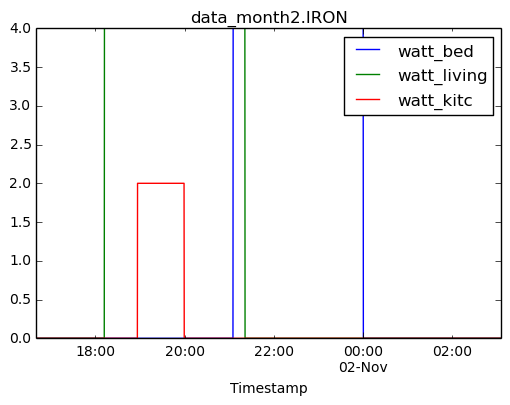

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT * FROM data_month2.light_sys1 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[4000],time_b[6500])
df = pd.read_sql(query, conn, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('data_month2.IRON')
df.plot(ax=ax )
plt.show()
df.to_csv('file.csv')
